In [1]:
import subprocess
import numpy as np
from tqdm import tqdm
from IPython.display import Image
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

from gmm import GMM

In [2]:
#load the dataset

dataset = load_iris()
x = dataset.data
y = dataset.target

In [3]:
'''
I want to make a gif of how the clustering changes as the alg comverges.
In order to do this, I'll write a function to save the current frame of 
the clustering, and then assemble the frames with a bash script
'''

def write_visualization(x, y, i, colors=['b', 'g', 'c', 'm', 'y', 'k', 'w'], write=True):
    
    classes = np.unique(y)
    fig, axes = plt.subplots(2, figsize=(5, 7))
    plt.tight_layout()
    fig.subplots_adjust(hspace=.5)

    
    axes[0].set_xlabel('Dimension 0')
    axes[0].set_ylabel('Dimension 1')
    axes[1].set_xlabel('Dimension 2')
    axes[1].set_ylabel('Dimension 3')

    for color_num, cur_class in enumerate(classes):

        #get data for the current class
        cur_class_data = [elem\
                          for i, elem in enumerate(x)\
                          if y[i] == cur_class]

        cur_class_data = np.stack(cur_class_data)

        #scatter it on the current plot
        cur_color = colors[color_num%len(colors)] 
        
        axes[0].scatter(cur_class_data[:, 0],
                        cur_class_data[:, 1],
                        c=cur_color)
        
        axes[1].scatter(cur_class_data[:, 2],
                        cur_class_data[:, 3],
                        c=cur_color)
        

    if write:
        plt.savefig('./data/' + str(i) + '.png')
        plt.close(fig)
    else:
        plt.show()

In [4]:
'''
The fit_transform method in the class won't let me access the intermediate data,
so I have to make a helper function here to run the training loop and call my
write_visualization function.

On a more serious project, I'd likely implement a iteration_end_callback functionality 
so that the user could pass functions to the fit_transform method to be run after
each iteration
'''

def fit_visualize(my_gmm, x, y):

    #get random initial assignment
    assignments = [np.random.randint(0, my_gmm._k)\
                   for row in x]

    #training loop
    prior_assignments = None
    for iteration in tqdm(range(my_gmm._iterations)):

        write_visualization(x, assignments, iteration)
        likelihoods = my_gmm._e_step(x, assignments)
        assignments = my_gmm._m_step(x, likelihoods)
        
        #stop training if converged
        if not prior_assignments is None and assignments == prior_assignments:
            print('Converged!')
            break
        
        prior_assignments = assignments

    write_visualization(x, assignments, iteration+1)

In [5]:
my_gmm = GMM(k=3,
             min_var=1e-6,
             iterations=25)

In [6]:
fit_visualize(my_gmm, x, y)

 20%|██        | 5/25 [00:00<00:03,  5.25it/s]

Converged!


Here is the part where I run ./make_gif.sh

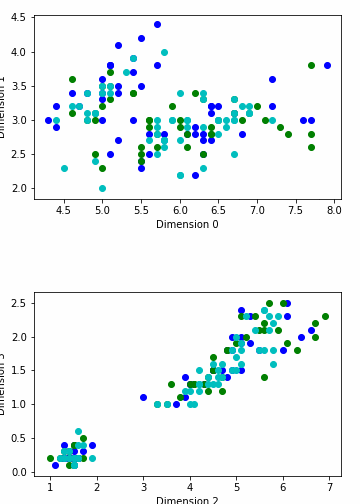

In [7]:
Image(filename="./data/animation.gif")

By the end of the algorithm, the data are clustered together much like they are with respect to groundtruth labels (below)

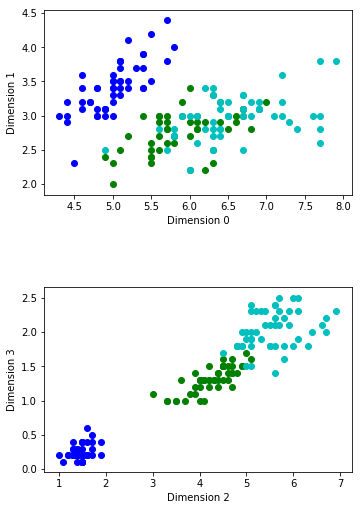

In [8]:
write_visualization(x, y, 0, write=False)